<a href="https://colab.research.google.com/github/Swatantraraj19/Soil-Analysis-and-Prediction-Using-Machine-Learning-and-VNIR-Spectroscopy-Data/blob/main/Project_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [20]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Soil Analysis Project/ngp_dataset_copy.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-20-2f27bf6325f6>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Soil Analysis Project/ngp_dataset_copy.csv")


In [21]:
data.head()

,SSN,phExtract,Ec Extract,CaCO3 equivalent %,oc,350,351,352,353,354,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,S1,9.71,8.60,2.13,0.10,0.046108,0.045455,0.047377,0.047641,0.047244,...,0.361984,0.362534,0.367887,0.373615,0.372376,0.368952,0.369218,0.369831,0.368443,0.366677
1,S2,9.31,10.98,2.00,0.16,0.058354,0.056818,0.060466,0.059517,0.056903,...,0.432295,0.431881,0.432052,0.431516,0.430653,0.429207,0.428507,0.427753,0.427360,0.428772
2,S3,10.06,11.40,4.63,0.33,0.054272,0.053030,0.054444,0.054254,0.053800,...,0.383106,0.380261,0.384512,0.392465,0.392107,0.386532,0.382463,0.379579,0.381684,0.384766
3,S4,9.69,7.54,9.13,0.30,0.057146,0.053030,0.054444,0.052904,0.050697,...,0.396354,0.390753,0.391703,0.395259,0.397433,0.400544,0.401183,0.399556,0.398051,0.395273
4,S5,9.75,5.16,12.63,0.25,0.063643,0.064394,0.067533,0.067480,0.066212,...,0.462253,0.463458,0.463963,0.463574,0.464622,0.465143,0.461718,0.457439,0.456462,0.456705


In [22]:
X = data.iloc[:119, 5:].values  # Features (spectroscopy data)
y = data.iloc[:119, 4].values   # Target variable (Soil Organic Carbon)

In [23]:
a = np.array(y)
len(a)

119

In [24]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))

In [26]:
# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled.ravel())

# Predict SOC for test set
X_test_scaled = sc_X.transform(X_test)
y_pred_scaled = svr.predict(X_test_scaled)
print(y_pred_scaled.shape)

(24,)


In [27]:
if y_pred_scaled.ndim == 1:
    y_pred_scaled = y_pred_scaled.reshape(-1, 1)
print(y_pred_scaled.shape)

(24, 1)


In [28]:
y_pred = sc_y.inverse_transform(y_pred_scaled)

In [29]:
# Compare the Test Set with Predicted Values
y_test = y_test.ravel()
y_pred = y_pred.ravel()
comparison_df = pd.DataFrame({'Actual_SOC': y_test, 'Predicted_SOC': y_pred})
print(comparison_df)

    Actual_SOC  Predicted_SOC
0         0.47       0.305275
1         0.32       0.417780
2         0.25       0.306800
3         0.42       0.314065
4         0.51       0.333427
5         0.19       0.336150
6         0.26       0.322939
7         0.46       0.392316
8         0.44       0.346622
9         0.26       0.316470
10        0.51       0.390331
11        0.11       0.359743
12        0.51       0.394494
13        0.36       0.434924
14        0.51       0.390361
15        0.49       0.409073
16        0.30       0.459718
17        0.10       0.360017
18        0.36       0.330572
19        0.06       0.371372
20        0.57       0.322597
21        0.42       0.323203
22        0.55       0.466455
23        0.49       0.326386


In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.022329462569240437


In [31]:
import math
rmse = math.sqrt(mse)
print("Root Mean Squared Value:", rmse)

Root Mean Squared Value: 0.14943046064722024


In [32]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -0.0252016993912203


In [33]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.13086402010629924


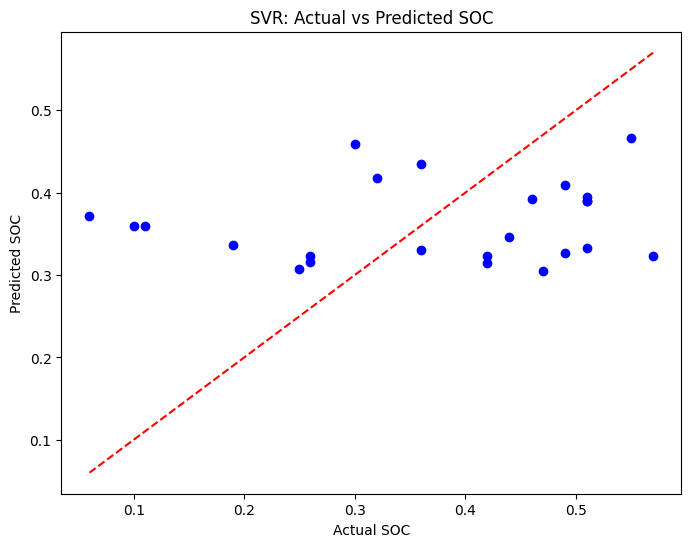

In [34]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted SOC values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual SOC')
plt.ylabel('Predicted SOC')
plt.title('SVR: Actual vs Predicted SOC')
plt.show()